In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as anim

In [3]:
TMin, TMax, N = 0.,25., 201
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)


In [4]:
r0 = np.array([1.0,0])

In [5]:
def df(x,b=1):
    return -b*x

In [6]:
def dfn(x, b=1, a=1):
    termino1=-b* (1/np.sqrt(a**2+np.power(x,2)))
    return x*termino1

In [7]:
def GetLeapFrog(r0,t,fun):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*fun(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*fun(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    return X,V

In [8]:
x1, v1=  GetLeapFrog(r0,t, df)
x2, v2=  GetLeapFrog(r0,t, dfn)

<IPython.core.display.Javascript object>


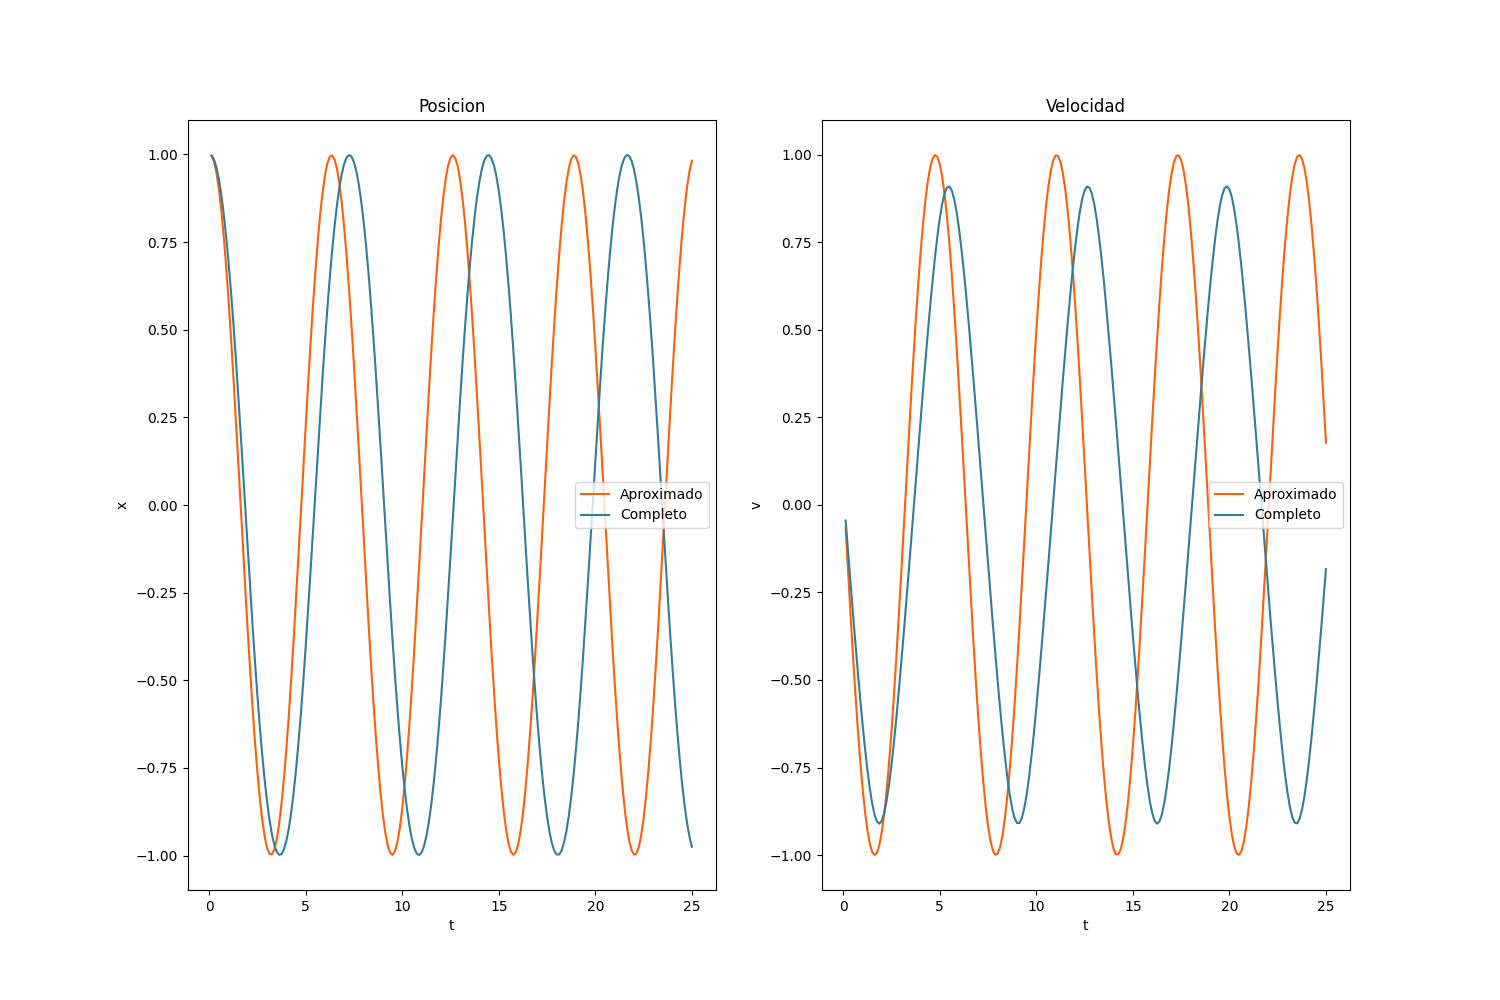

In [19]:
fig0 = plt.figure(figsize=(15,10))
#Crear plots
ax = fig0.add_subplot(121)
ax1 = fig0.add_subplot(122)
#Graficar
ax.plot(t[1:],x1, '#fc600a',label='Aproximado')
ax.plot(t[1:],x2, '#337c99',label='Completo')
ax1.plot(t[1:],v1, '#fc600a',label='Aproximado')
ax1.plot(t[1:],v2, '#337c99',label='Completo')
#legends
ax.legend()
ax1.legend()
#Titulos
ax.set_title('Posicion')
ax1.set_title('Velocidad')
#Titulo ejes
ax.set_xlabel('t')
ax.set_ylabel('x')
ax1.set_xlabel('t')
ax1.set_ylabel('v')
#Guardar
plt.savefig('../Images/osciladores')
plt.show()